<a href="https://colab.research.google.com/github/rakeshrocky58008/IITK-ML/blob/Q2/Assignment2_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


                                                    Assignment 2 Optiization

                                                                      RAKESH BR        ROLL NO 241562524     

In [120]:
import numpy as np
import matplotlib.pyplot as plt

Question 2:  Implement the grid search algorithm on the following function f(x, y) = (x−a)
2+5(y−x
2
)
2
whose optimum is (a, a2
). Generate a at random in the interval (0, 1) and write a function
that takes input as the total number of grid points and outputs the distance of the optimum
found by the grid search algorithm (x
⋆
, y⋆
) and the actual optimum (a, a2
). Use this function
to generate a plot which looks something like the one in Fig. 2.

In [121]:
def gridsearch(a, n_points):

    min_r, max_r = -5, 5
    step = (max_r - min_r) / n_points


    grid = [(x, y) for x in np.arange(min_r, max_r + step, step) for y in np.arange(min_r, max_r + step, step)]

    evals = [((x - a)**2 + 5 * (y - x**2)**2) for x, y in grid]
    min_eval_index = evals.index(min(evals))
    best_x, best_y = grid[min_eval_index]

    accuracy = np.sqrt((best_x - a)**2 + (best_y - a**2)**2)

    return accuracy


In [140]:
n_points_values = np.logspace(np.log10(100), np.log10(5000), num=10, dtype=int)
accuracies = []
a = np.random.random()

for n_points in n_points_values:
    acc = gridsearch(a, n_points)
    accuracies.append(acc)

print(accuracies)


[0.07027126075792142, 0.027340691384132906, 0.01029324800099075, 0.005924501247906112, 0.012668010960897194, 0.0024775005481502935, 0.001389050369196984, 0.0007220690975556896, 0.0010150909596968625, 0.0006871592078831147]


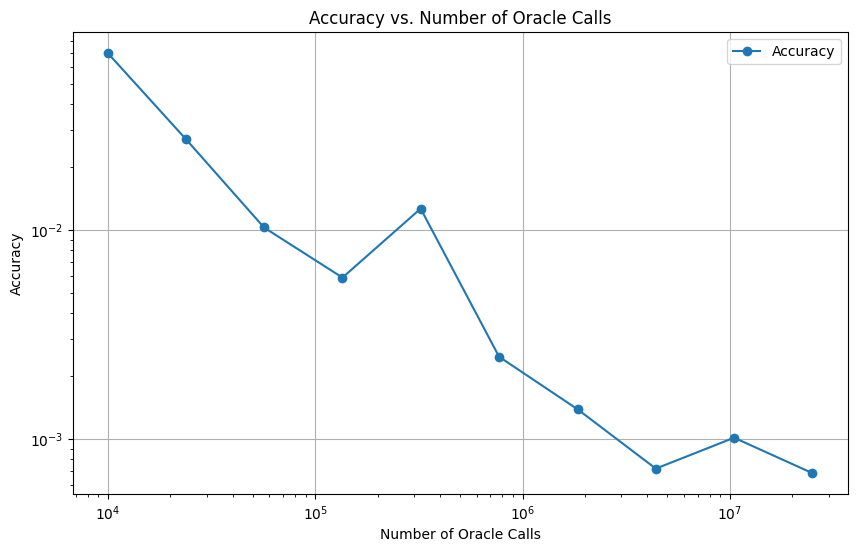

In [141]:

plt.figure(figsize=(10, 6))
plt.plot(n_points_values**2, accuracies, '-o', label='Accuracy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Oracle Calls')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Oracle Calls')
plt.legend()
plt.grid(True)
plt.show()




---



Question 3 : Implement the Shubert-Pyavskii method on the function f(x)=x^4-4x^3-30x2+ 50x-200 , so as to obtain a figure similar to that in fig 3 . Take care to display the lower bound ~f in orange color while the original function f in blue color.

In [136]:
def f(x):
    return x**4 - 4*x**3 - 30*x**2 + 50*x - 200

In [137]:

def shubert_pyavskii(x_start, x_end, num_points, epsilon=0.5):
    x_values = np.linspace(x_start, x_end, num_points)
    f_values = f(x_values)

    lower_bound = np.full_like(x_values, -np.inf)


    for i in range(1, len(x_values)):
        slope = (f_values[i] - f_values[i-1]) / (x_values[i] - x_values[i-1])
        for j in range(i, len(x_values)):
            lower_bound[j] = max(lower_bound[j], f_values[i] + slope * (x_values[j] - x_values[i]) - epsilon)

    plt.figure()
    plt.plot(x_values, f_values, label=r'$f(x)$', color='blue')
    plt.plot(x_values, lower_bound, label=r'$\tilde{f}(x)$', color='orange')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Shubert-Pyavskii Method: Implementation')
    plt.legend()
    plt.grid(True)
    plt.show()



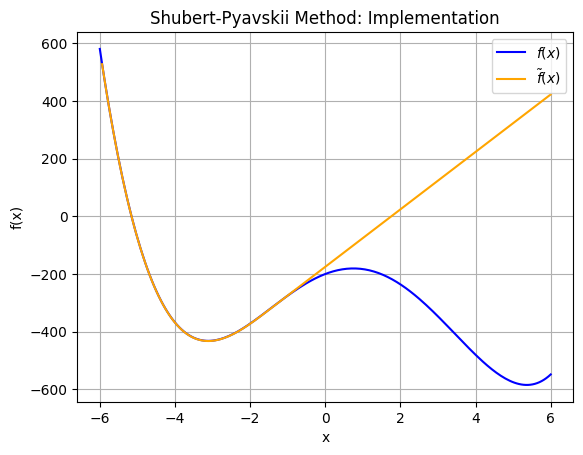

In [139]:
shubert_pyavskii(-6, 6, 200, epsilon=0.5)




---



Question 4 :  Implement the Bisection, Secant, and Dekker’s methods to find the root of the function f(x) =
x
3 − x − 1 within the interval (−1.5, 2). Output the number of iterations required vs. the
accuracy required by the three methods. The output of the code written by you should result
in a figure similar to the one in Fig. 4

In [115]:
def f(x):
    return x**3 - x - 1


In [ ]:
a, b = -1.5, 2
epsilons = np.logspace(-9, -1, 9)
bisect_iters = []

for tol in epsilons:
    iters = 0
    a_temp, b_temp = a, b
    while (b_temp - a_temp) / 2 > tol:
        c = (a_temp + b_temp) / 2
        if f(c) == 0:
            break
        elif f(a_temp) * f(c) < 0:
            b_temp = c
        else:
            a_temp = c
        iters += 1
    bisect_iters.append(iters)

print("Bisection method iterations for each epsilon:", bisect_iters)


Bisection method iterations for each epsilon: [31, 28, 25, 21, 18, 15, 11, 8, 5]


In [116]:
secant_iters = []
x0, x1 = -1.5, 2

for tol in epsilons:
    iters = 0
    x0_temp, x1_temp = x0, x1
    while abs(x1_temp - x0_temp) > tol:
        x_temp = x1_temp - f(x1_temp) * (x1_temp - x0_temp) / (f(x1_temp) - f(x0_temp))
        x0_temp = x1_temp
        x1_temp = x_temp
        iters += 1
    secant_iters.append(iters)


print("Secant method iterations for each epsilon:", secant_iters)


Secant method iterations for each epsilon: [17, 17, 17, 16, 16, 6, 6, 6, 6]


In [117]:
dekker_iters = []
a, b = -1.5, 2

for tol in epsilons:
    iters = 0
    x0_temp, x1_temp = a, b
    while abs(x1_temp - x0_temp) > tol:
        if f(x0_temp) * f(x1_temp) < 0:
            x2 = (x0_temp + x1_temp) / 2
        else:
            x2 = x1_temp - f(x1_temp) * (x1_temp - x0_temp) / (f(x1_temp) - f(x0_temp))
        if abs(f(x2)) < tol:
            break
        if f(x0_temp) * f(x2) < 0:
            x1_temp = x2
        else:
            x0_temp = x2
        iters += 1
    dekker_iters.append(iters)

print("Dekker method iterations for each epsilon:", dekker_iters)




Dekker method iterations for each epsilon: [32, 28, 22, 22, 18, 13, 10, 8, 3]


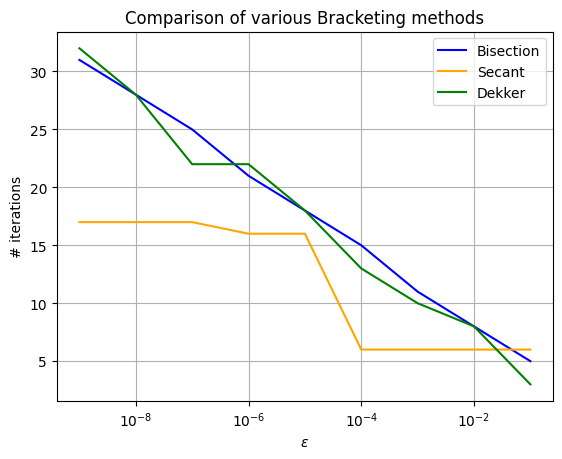

In [118]:
import matplotlib.pyplot as plt

plt.plot(epsilons, bisect_iters, label='Bisection', color='blue')
plt.plot(epsilons, secant_iters, label='Secant', color='orange')
plt.plot(epsilons, dekker_iters, label='Dekker', color='green')
plt.xscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel('# iterations')
plt.title('Comparison of various Bracketing methods')
plt.legend()
plt.grid(True)
plt.show()

